# Melbourne Housing Snapshot

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Set2')

In [2]:
df = pd.read_csv('melb_data.csv')

## Feature Explaination

- **Rooms**: Number of rooms

- **Price**: Price in dollars

- **Method**:
    - S  - property sold
    - SP - property sold prior
    - PI - property passed in
    - PN - sold prior not disclosed
    - SN - sold not disclosed
    - NB - no bid
    - VB - vendor bid
    - W  - withdrawn prior to auction
    - SA - sold after auction
    - SS - sold after auction price not disclosed
    - N/A - price or highest bid not available

- **Type**:
    - br - bedroom(s)
    - h - house,cottage,villa, semi,terrace
    - u - unit, duplex
    - t - townhouse
    - dev site - development site
    - o res - other residential

- **SellerG**: Real Estate Agent

- **Date**: Date sold

- **Distance**: Distance from CBD

- **Regionname**: General Region (West, North West, North, North east …etc)

- **Propertycount**: Number of properties that exist in the suburb.

- **Bedroom2** : Scraped # of Bedrooms (from different source)

- **Bathroom**: Number of Bathrooms

- **Car**: Number of carspots

- **Landsize**: Land Size

- **BuildingArea**: Building Size

- **CouncilArea**: Governing council for the area

In [3]:
# Changing the Date Column from object to Date type

df['Date'] = df['Date'].astype('datetime64[ns]')

# 1) Checking for Null Values

In [4]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [5]:
# Filling the missing values in Car column with the Mode
df['Car'].fillna(value=df['Car'].mode()[0], inplace=True)

# Filling the missing values in BuildingArea column with the Mean
df['BuildingArea'].fillna(value=df['Car'].mean(), inplace=True)

# Filling the missing values in YearBuilt column with the Mode
df['YearBuilt'].fillna(value=df['YearBuilt'].mode()[0], inplace=True)

# Filling the missing values in CouncilArea column with the Mode
df['CouncilArea'].fillna(value=df['CouncilArea'].mode()[0], inplace=True)

**All the missing values have been filled**

# 2) EDA

**1) Distribution of the Price Column**

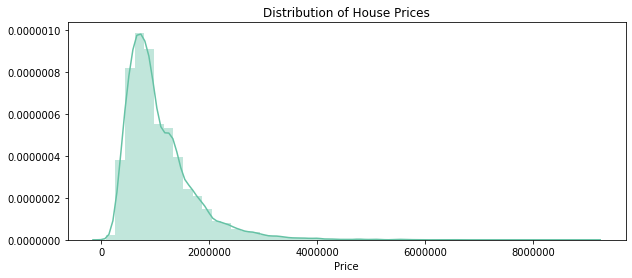

In [6]:
plt.figure(figsize=(10, 4))

sns.distplot(a=df['Price'])

plt.title('Distribution of House Prices');

In [7]:
print(f'The Mean of the Price Column is {round(df["Price"].mean())} $')
print(f'The Median of the Price Column is {round(df["Price"].median())} $')      

The Mean of the Price Column is 1075684 $
The Median of the Price Column is 903000 $


**We can observe that the Price is not normally Distributed and it's Skewed to the Right**

**2) Bar Plot Number of Rooms**

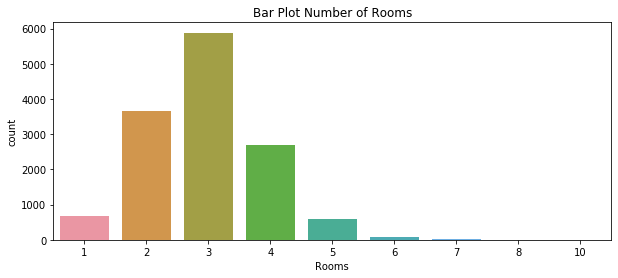

In [8]:
plt.figure(figsize=(10, 4))

sns.countplot(x='Rooms', data=df)

plt.title('Bar Plot Number of Rooms');

**Most Houses have 3 rooms, followed by 2 & 4 Rooms**

**3) Bar Plot - Selling Status of House**

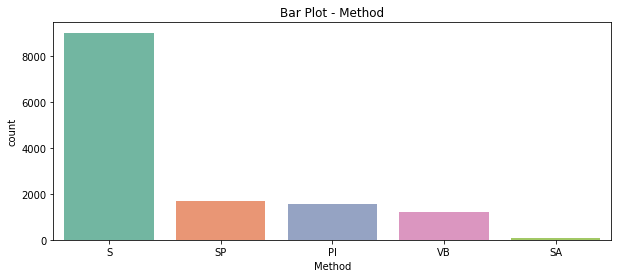

In [9]:
plt.figure(figsize=(10, 4))

sns.countplot(x='Method', data=df)

plt.title('Bar Plot - Method');

**Most of the Properties in the Dataset are Sold**

**4) Bar Plot - House Type**

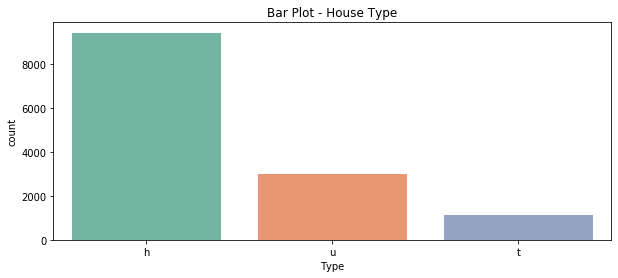

In [10]:
plt.figure(figsize=(10, 4))

sns.countplot(x='Type', data=df)

plt.title('Bar Plot - House Type');

**Most of the Properties are of Type House**

**5) Bar Plot - Number of BathRooms**

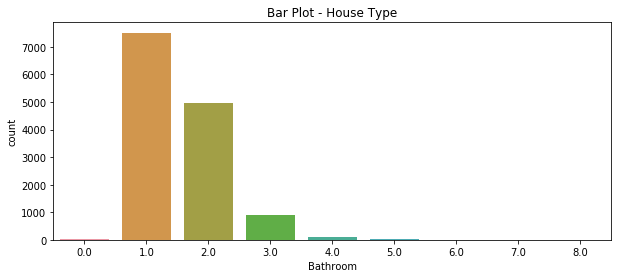

In [11]:
plt.figure(figsize=(10, 4))

sns.countplot(x='Bathroom', data=df)

plt.title('Bar Plot - House Type');

**Most Houses have 1-2 BathRooms**

**6) Bar Plot - Properties Listed in each Region**

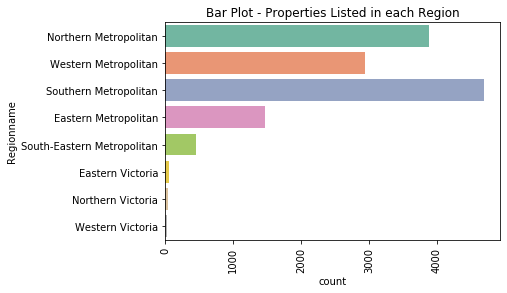

In [12]:
sns.countplot(y='Regionname', data=df)

plt.title('Bar Plot - Properties Listed in each Region')
plt.xticks(rotation=90);

**7) Bar Plot - Number of Rooms in each Region**

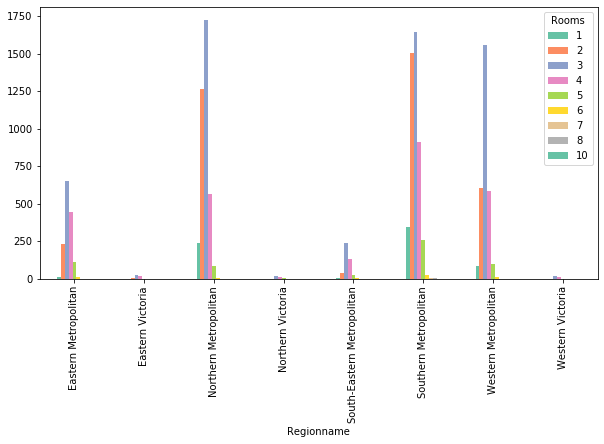

In [13]:
pd.crosstab(df['Regionname'], df['Rooms']).plot(kind='bar',
                                            figsize=[10, 5]);

plt.xticks(rotation=90);

- **In Eastern Metropolitan Region, there are More 4 Rooms Houses, which is Different from other regions which have more 2 Room Houses**

**8) Bar Plot - Number of Rooms in each House Type**

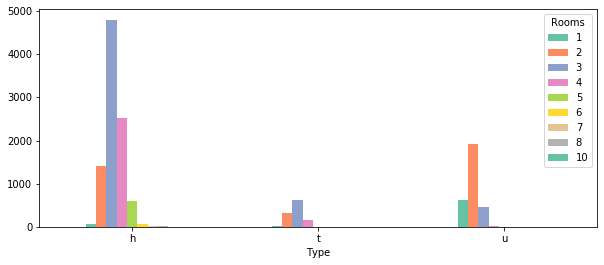

In [14]:
pd.crosstab(df['Type'], df['Rooms']).plot(kind='bar',
                                            figsize=[10, 4]);

plt.xticks(rotation=0);

- **We can see that Unit/Duplex have mostly 2 Rooms, while in case of House or TownHouse there are mostly 3 Rooms**

**9) Box Plot - Price Range Per Region**

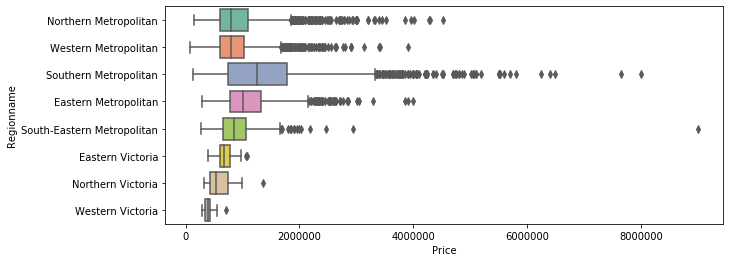

In [15]:
plt.figure(figsize=(10, 4))

sns.boxplot(x='Price', y='Regionname', data=df);

**We can See that Southern MetroPolitan Areas have the Highest Prices**

**10) Bar Plot - Average Price Per Room**

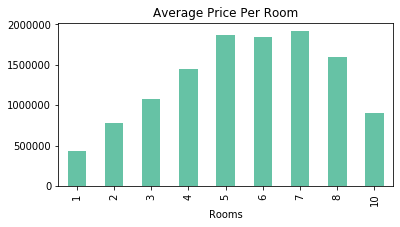

In [16]:
plt.figure(figsize=(6, 3))

df.groupby('Rooms')['Price'].mean().plot(kind='bar')

plt.title('Average Price Per Room');

**We can see that as the Number of Rooms Increases the Price of the House tend to Increase, But for Houses with 5-8 rooms the Price almost remains the same**

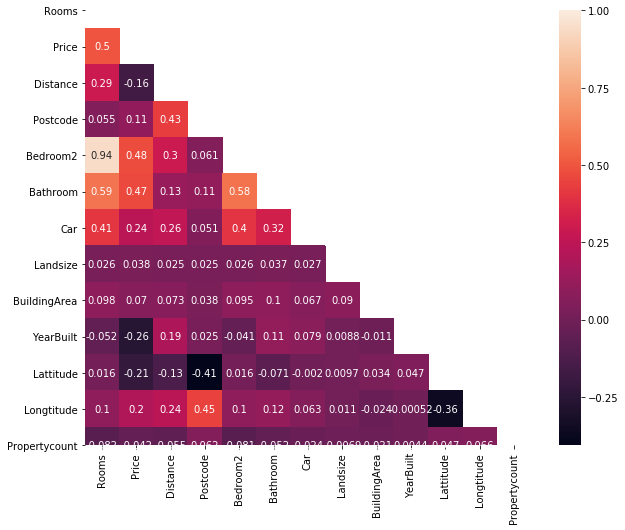

In [17]:
# Creating a numpy array of zeros
mask = np.zeros_like(df.corr()) 
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(10,8))

sns.heatmap(df.corr(), annot=True, mask=mask);

- **BedRoom & BathRoom has as correlation of 0.48 & 0.47 respectively with the Price Column**
- **BedRoom2 & Rooms have a very high correlation, which can cause the Problem of Multicollinearity**

**11) Bar Plot - Property Year Built**

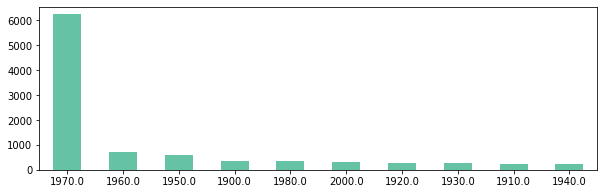

In [18]:
plt.figure(figsize=(10, 3))

df['YearBuilt'].value_counts().nlargest(10).plot(kind='bar')

plt.xticks(rotation=0);

**We can see that most of the Houses were Built in the Year 1970**

**12) Histogram - Price Before & After Log Transform**

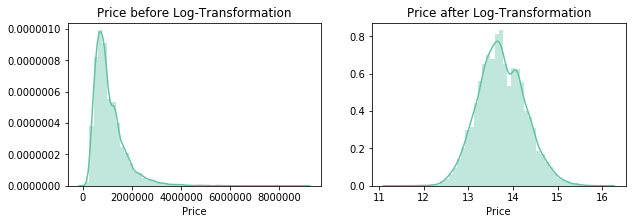

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax = ax.flatten()

sns.distplot(a=df['Price'], ax=ax[0])
ax[0].set_title('Price before Log-Transformation')


sns.distplot(a=np.log(df['Price']), ax=ax[1])
ax[1].set_title('Price after Log-Transformation');

# 3) Feature Encoding

In [20]:
X = df.drop(['Price', 'Address', 'Date', 'SellerG'], axis=1)
y = np.log(df['Price'])

# Converting the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname']

one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough'
                            )

transformed_X = transformer.fit_transform(X)
transformed_X = pd.DataFrame(transformed_X)

In [21]:
#Splitting X, y into training and test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y,
                                                    test_size=0.2, random_state=0)

# 1) Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

regression = LinearRegression()

regression.fit(X_train, y_train)

print(regression.score(X_test, y_test))

0.7904689144394816


In [23]:
print(regression.score(X_train, y_train))

0.7963353244732885


In [24]:
predictions = regression.predict(X_test)

In [25]:
from sklearn import metrics


predictions = regression.predict(X_train)
print("R2 Score/Bias = {}".format(metrics.r2_score(y_train,predictions)))

predictions = regression.predict(X_test)
print("R2 Score/Variance = {}".format(metrics.r2_score(y_test,predictions)))

R2 Score/Bias = 0.7963353244732885
R2 Score/Variance = 0.7904689144394815


**The Bias & Variance are same, so there is no Overfitting or Underfitting**

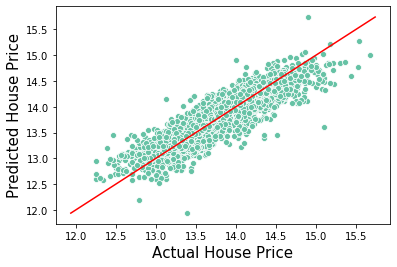

In [26]:
# Plotting Actual vs Predicted Values
sns.scatterplot(x=y_test, y=predictions)
sns.lineplot(predictions, predictions,  color='red') 

plt.xlabel('Actual House Price', fontsize = 15)
plt.ylabel('Predicted House Price', fontsize = 15);

In [27]:
# Difference between Actual & Predicted Values
residuals = y_test - predictions

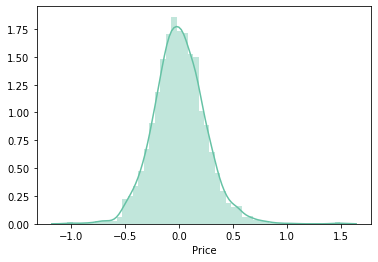

In [28]:
sns.distplot(residuals);

In [29]:
from scipy import stats

stats.skew(residuals)

0.2778339592314776

**The Skew is between -0.5 -> +0.5, so the residuals are Normally Distributed**

The Mean of Residuals is 0


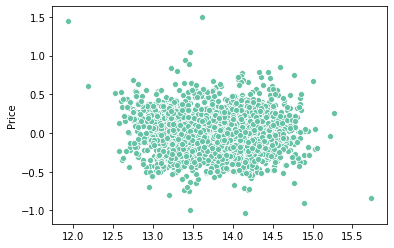

In [30]:
print('The Mean of Residuals is {}' .format(round(residuals.mean())))

sns.scatterplot(predictions,residuals)
plt.show();

**There are no visible Patterns, the Residuals is Homoscadastic**

# 2) Ridge Regression

In [31]:
from sklearn.preprocessing import LabelEncoder

# Creating a DataFrame from Categorical Features
df_cat = df[['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname', 'SellerG']]

# Encoding all the Categorical Variables
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
df_cat.head()

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Suburb,Type,Method,CouncilArea,Regionname,SellerG
0,0,0,1,31,2,23
1,0,0,1,31,2,23
2,0,0,3,31,2,23
3,0,0,0,31,2,23
4,0,0,4,31,2,155


In [32]:
df_num = df.select_dtypes(exclude='O').drop('Date', axis=1)

In [33]:
df_new = pd.concat([df_num, df_cat], axis=1)

In [34]:
X = df_new.drop(['Price'], axis=1)
y = np.log(df['Price'])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

In [36]:
for i in range(10):
    r=Ridge(alpha=i)
    r.fit(X_train, y_train)
    print(i,"=",r.score(X_test, y_test))

0 = 0.7073501202932457
1 = 0.7073489985691405
2 = 0.7073286159827309
3 = 0.7072903531964871
4 = 0.7072354885172598
5 = 0.7071652072141341
6 = 0.7070806096785065
7 = 0.7069827186295949
8 = 0.7068724855217975
9 = 0.7067507962764155


In [37]:
from sklearn.model_selection import GridSearchCV

rgr_ls = Lasso(fit_intercept = True)
param_grid = {
    "alpha": [0.0002, 0.0003, 0.0005, 0.0008, 0.001]
}
searchCV = GridSearchCV(rgr_ls, cv=4, param_grid=param_grid, scoring='r2')
searchCV.fit(X, y)

print(searchCV.best_score_)
print(searchCV.best_params_)

0.6815080890113994
{'alpha': 0.0002}


In [38]:
lasso_reg = Lasso(alpha=0.0002)
lasso_reg.fit(X_train, y_train)
print('Bias = ', lasso_reg.score(X_train, y_train))
print('Variance = ', lasso_reg.score(X_test, y_test))

Bias =  0.7028044568595366
Variance =  0.7073261593477079


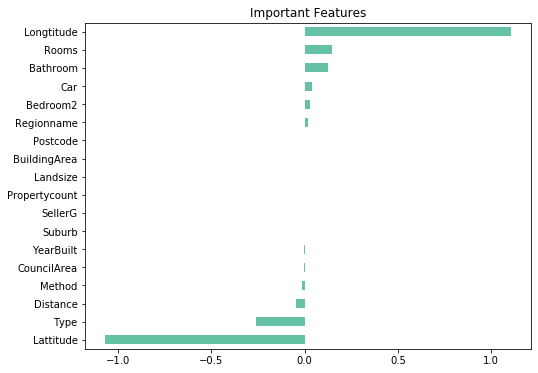

In [39]:
lasso = searchCV.best_estimator_
coefs = pd.Series(lasso.coef_,index=X.columns)

plt.figure(figsize=(8, 6))
coefs.sort_values().plot.barh()
plt.title('Important Features');

In [40]:
coefs[abs(coefs)>0.01]

Rooms         0.143870
Distance     -0.044116
Bedroom2      0.029097
Bathroom      0.122890
Car           0.038152
Lattitude    -1.070068
Longtitude    1.104831
Type         -0.258725
Method       -0.014454
Regionname    0.019126
dtype: float64

In [41]:
df2 = df[['Rooms', 'Distance', 'Bathroom', 'Car', 'Price',
          'Lattitude', 'Longtitude', 'Type', 'Regionname', 'Method']]

In [42]:
X = df2.drop(['Price'], axis=1)
y = np.log(df2['Price'])

categorical_features = ['Type', 'Regionname', 'Method']

one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough'
                            )

transformed_X = transformer.fit_transform(X)
transformed_X = pd.DataFrame(transformed_X)

In [43]:
#Splitting X, y into training and test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y,
                                                    test_size=0.2, random_state=0)

# 4) Linear Regression after Eliminating Unimportant Features

In [44]:
regression = LinearRegression()

regression.fit(X_train, y_train)

print(regression.score(X_test, y_test))

print(regression.score(X_train, y_train))

0.7131696784588215
0.7120733587531949


In [45]:
predictions = regression.predict(X_test)

In [46]:
predictions = regression.predict(X_train)
print("R2 Score/Bias = {}".format(metrics.r2_score(y_train,predictions)))

predictions = regression.predict(X_test)
print("R2 Score/Variance = {}".format(metrics.r2_score(y_test,predictions)))

R2 Score/Bias = 0.7120733587531949
R2 Score/Variance = 0.7131696784588215


**The Bias & Variance are same, so there is no Overfitting or Underfitting**

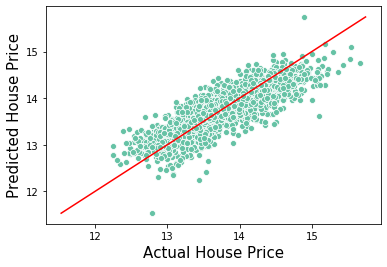

In [47]:
# Plotting Actual vs Predicted Values
sns.scatterplot(x=y_test, y=predictions)
sns.lineplot(predictions, predictions,  color='red') 

plt.xlabel('Actual House Price', fontsize = 15)
plt.ylabel('Predicted House Price', fontsize = 15);

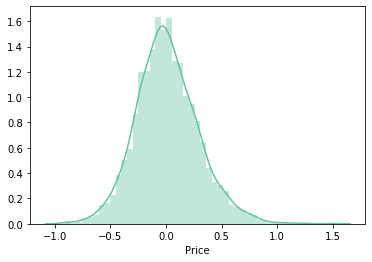

In [48]:
# Difference between Actual & Predicted Values
residuals = y_test - predictions

sns.distplot(residuals);

In [49]:
stats.skew(residuals)

0.37158882407908816

**The Skew is between -0.5 -> +0.5, so the residuals are Normally Distributed**

In [50]:
print('The Mean of Residuals is {}' .format(round(residuals.mean())))

The Mean of Residuals is 0


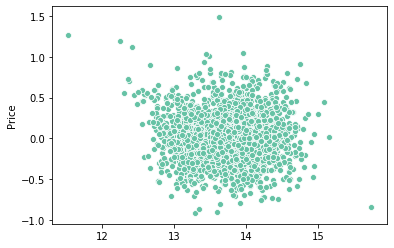

In [51]:
sns.scatterplot(predictions,residuals)
plt.show();

**There are no visible Patterns, the Residuals is Homoscadastic**

**By using Regularization Techniques we have reduced model complexity, by eliminating number of unimportant features**